In [12]:
%pylab inline
import pandas as pd
import seaborn as sns
import scipy
import skimage

df = pd.read_excel("C:/Users/Jirik/data/medical/processed/scaffan2019/SA_experiments.xlsx")
# df = pd.read_excel("C:/Users/Jirik/data/medical/processed/metacentrum/SA_experiments.xlsx")
# df = pd.read_excel("C:/Users/Jirik/data/medical/processed/SA_experiments.xlsx")
df

Populating the interactive namespace from numpy and matplotlib


,Annotation Color,Annotation Details,Annotation ID,Annotation Title,Area,Area unit,Branch number,Central Vein Dice,Central Vein Jaccard,Central vein area,...,Processing;Skeleton Analysis;Working Resolution,Processing;Texture Analysis;GLCM Levels,Processing;Texture Analysis;Tile Size,Processing;Texture Analysis;Tile Spacing,Processing;Texture Analysis;Working Resolution,Scaffan Version,Skeleton length,platform.node,platform.processor,platform.system
0,#00FF00,PFCVI=1 SNI=0 SWP=0,1,NaN,0.681016,mm,7686.0,1.000000,1.000000,0.008066,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,15.85402,elmo5-13.hw.elixir-czech.cz,NaN,Linux
1,#00FF00,PFCVI=1 SNI=0 SWP=0,2,NaN,0.968983,mm,7648.0,1.000000,1.000000,0.005598,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,14.98133,elmo5-13.hw.elixir-czech.cz,NaN,Linux
2,#00FF00,PFCVI=1 SNI=0 SWP=0,6,NaN,1.192457,mm,5387.0,1.000000,1.000000,0.002716,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,10.14741,elmo5-13.hw.elixir-czech.cz,NaN,Linux
3,#00FF00,PFCVI=1 SNI=0 SWP=0,9,NaN,1.756423,mm,12800.0,1.000000,1.000000,0.026787,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,25.96321,elmo5-13.hw.elixir-czech.cz,NaN,Linux
4,#00FF00,PFCVI=1 SNI=0 SWP=0,10,NaN,1.011402,mm,9243.0,1.000000,1.000000,0.000162,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,17.64581,elmo5-13.hw.elixir-czech.cz,NaN,Linux
5,#00FF00,PFCVI=1 SNI=0 SWP=0,1,NaN,1.577474,mm,NaN,0.119954,0.063804,0.122824,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,NaN,elmo5-12.hw.elixir-czech.cz,NaN,Linux
6,#00FF00,PFCVI=1 SNI=0 SWP=0,2,NaN,1.040017,mm,NaN,0.076893,0.039984,0.140005,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,NaN,elmo5-12.hw.elixir-czech.cz,NaN,Linux
7,#00FF00,PFCVI=1 SNI=0 SWP=0,6,NaN,1.192378,mm,NaN,0.037776,0.019252,0.141088,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,NaN,elmo5-12.hw.elixir-czech.cz,NaN,Linux
8,#00FF00,PFCVI=1 SNI=0 SWP=0,9,NaN,1.527437,mm,NaN,0.151715,0.082084,0.317301,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,NaN,elmo5-12.hw.elixir-czech.cz,NaN,Linux
9,#00FF00,PFCVI=1 SNI=0 SWP=0,10,NaN,0.970199,mm,NaN,0.011015,0.005538,0.023293,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,NaN,elmo5-12.hw.elixir-czech.cz,NaN,Linux


In [13]:
df.keys()

Index(['Annotation Color', 'Annotation Details', 'Annotation ID',
       'Annotation Title', 'Area', 'Area unit', 'Branch number',
       'Central Vein Dice', 'Central Vein Jaccard', 'Central vein area',
       'Datetime', 'Dead ends number', 'Experiment Datetime',
       'Experiment Title', 'File Name', 'File Path', 'GLCM Correlation',
       'GLCM Energy', 'GLCM Homogenity', 'Input;Data Info', 'Input;File Path',
       'Lobulus Border Dice', 'Lobulus Border Jaccard', 'Output image size 0',
       'Output image size 1', 'Output pixel size 0', 'Output pixel size 1',
       'Output;Common Spreadsheet File', 'Output;Directory Path',
       'Processing Time [s]',
       'Processing;Lobulus Segmentation;Annotation Margin',
       'Processing;Lobulus Segmentation;Border Segmentation;Iterations',
       'Processing;Lobulus Segmentation;Border Segmentation;Lambda1',
       'Processing;Lobulus Segmentation;Border Segmentation;Lambda2',
       'Processing;Lobulus Segmentation;Border Segmentatio

In [14]:
df["Experiment Title"].unique()

array(['first area evaluation', 'first segmentation params'], dtype=object)

In [15]:
df[df["Experiment Title"] == "first segmentation params"][
    ["Central Vein Jaccard", "Lobulus Border Jaccard", 'Processing;Lobulus Segmentation;Central Vein Segmentation;Threshold']
]

,Central Vein Jaccard,Lobulus Border Jaccard,Processing;Lobulus Segmentation;Central Vein Segmentation;Threshold
5,0.063804,0.405271,0.18
6,0.039984,0.813757,0.18
7,0.019252,0.888639,0.18
8,0.082084,0.950546,0.18
9,0.005538,0.975832,0.18
13,0.421244,0.898777,0.18
14,0.750075,0.925042,0.18
15,0.390393,0.956952,0.18
18,0.692103,0.874646,0.18
19,NaN,0.912767,0.18


In [16]:
df["Central Vein Threshold"] = df['Processing;Lobulus Segmentation;Central Vein Segmentation;Threshold']

pd.pivot_table(
    df[df["Central Vein Threshold"] == 0.18], 
    values=[ "Lobulus Border Jaccard"], 
#     columns=["Central Vein Threshold"], 
    index=["File Name", "Annotation ID"], 
    margins=True, 
#     margins_name=["Central Vein Threshold"]
)

Lobulus Border Jaccard
File Name                             Annotation ID                        
PIG-001_J-17-0571_LM central_HE.ndpi  1                            0.801757
                                      2                            0.937919
                                      6                            0.962880
                                      9                            0.983515
                                      10                           0.991944
PIG-002_J-18-0091_HE.ndpi             2                            0.966259
                                      3                            0.975014
                                      4                            0.985651
PIG-002_J-18-0092_HE.ndpi             0                            0.958215
                                      7                            0.970922
PIG-003_J-18-0165_HE.ndpi             0                            0.925932
                                      2                            0.982208
                                      3                            0.977880
                                      5                            0.983646
                                      7                            0.970724
                                      8                            0.949325
PIG-003_J-18-0166_HE.ndpi             1                            0.982072
                                      7                            0.990083
PIG-004_BBJ-004-2 _HE_parenchyme.ndpi 4                            0.983934
                                      9                            0.986278
PIG-004_BBJ-004-4_HE_parenchyme.ndpi  0                            0.979326
                                      1                            0.980486
                                      3                            0.981278
                                      4                            0.981808
                                      9                            0.977765
All                                                                0.966673

In [17]:
df["Central Vein Threshold"] = df['Processing;Lobulus Segmentation;Central Vein Segmentation;Threshold']
pd.pivot_table(
    df, 
    values=["Central Vein Jaccard"], 
    columns=["Central Vein Threshold", ], 
    index=["File Name", "Annotation ID"], 
    margins=True,# "Central Vein Threshold", #True, 
#     margins_name=["Central Vein Threshold"]
)

Central Vein Jaccard  \
Central Vein Threshold                                              0.17   
File Name                             Annotation ID                        
PIG-001_J-17-0571_LM central_HE.ndpi  1                         0.066065   
                                      2                         0.042344   
                                      6                         0.018336   
                                      9                         0.083045   
                                      10                        0.008140   
PIG-002_J-18-0091_HE.ndpi             2                         0.383688   
                                      3                         0.721000   
                                      4                         0.306242   
PIG-002_J-18-0092_HE.ndpi             0                         0.693739   
PIG-003_J-18-0165_HE.ndpi             2                         0.760696   
                                      0                         0.031943   
                                      7                         0.128829   
                                      8                         0.561234   
PIG-003_J-18-0166_HE.ndpi             1                         0.019244   
                                      7                         0.014444   
PIG-004_BBJ-004-2 _HE_parenchyme.ndpi 9                         0.489928   
                                      4                         0.842558   
PIG-004_BBJ-004-4_HE_parenchyme.ndpi  1                         0.553940   
                                      9                         0.000000   
                                      3                         0.000000   
                                      4                         0.000000   
                                      0                         0.192867   
All                                                             0.269013   

                                                                         \
Central Vein Threshold                                   0.18      0.19   
File Name                             Annotation ID                       
PIG-001_J-17-0571_LM central_HE.ndpi  1              0.687935  0.061511   
                                      2              0.679995  0.038841   
                                      6              0.673084  0.019189   
                                      9              0.694028  0.081805   
                                      10             0.668513  0.005261   
PIG-002_J-18-0091_HE.ndpi             2              0.807081  0.421179   
                                      3              0.916692  0.779902   
                                      4              0.796798  0.431094   
PIG-002_J-18-0092_HE.ndpi             0              0.897368  0.643895   
PIG-003_J-18-0165_HE.ndpi             2              0.878208  0.634432   
                                      0              0.701299  0.042239   
                                      7              0.926997  0.704305   
                                      8              0.853261  0.492366   
PIG-003_J-18-0166_HE.ndpi             1              0.674559  0.457441   
                                      7              0.672520  0.046519   
PIG-004_BBJ-004-2 _HE_parenchyme.ndpi 9              0.882334  0.731278   
                                      4              0.953841  0.802038   
PIG-004_BBJ-004-4_HE_parenchyme.ndpi  1              0.851934  0.535598   
                                      9              0.666667  0.000000   
                                      3              0.666667  0.000000   
                                      4              0.666667  0.000000   
                                      0              0.732710  0.625979   
All                                                  0.770416  0.343403   

                                                                         
Central Vein Threshold                            

In [62]:
# pd.melt(df)

# Boxplots

Text(0, 0.5, '')

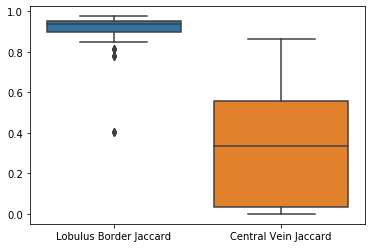

In [60]:

dfs = df[df["Experiment Title"] == 'first segmentation params'][[
                "Lobulus Border Jaccard",
                "Central Vein Jaccard"
]]
dfsmelt = pd.melt(dfs)
ax = sns.boxplot(x="variable", y="value", data=dfsmelt)
plt.xlabel('')
plt.ylabel('')
# ax = sns.swarmplot(x="variable", y="value", data=dfsmelt, color=".25")

# dfsmelt = pd.melt(dfs).rename(columns={"variable":"Structure", "value":"Jaccard Index"})
# sns.boxplot(x="Structure", y="Jaccard Index", data=dfsmelt)


C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


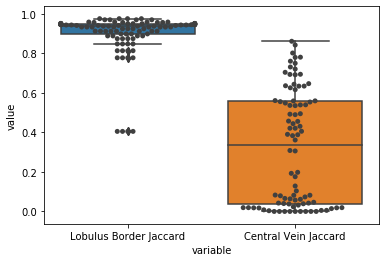

In [57]:

dfs = df[df["Experiment Title"] == 'first segmentation params'][[
                "Lobulus Border Jaccard",
                "Central Vein Jaccard"
]]
dfsmelt = pd.melt(dfs)
ax = sns.boxplot(x="variable", y="value", data=dfsmelt)
plt.xlabel('')
plt.ylabel('')
ax = sns.swarmplot(x="variable", y="value", data=dfsmelt, color=".25")

# dfsmelt = pd.melt(dfs).rename(columns={"variable":"Structure", "value":"Jaccard Index"})
# sns.boxplot(x="Structure", y="Jaccard Index", data=dfsmelt)


Text(0, 0.5, '')

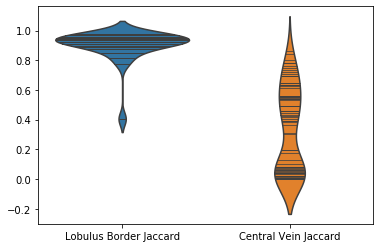

In [61]:
ax = sns.violinplot(x="variable", y="value", data=dfsmelt,
              inner="stick")
# ax = sns.swarmplot(x="variable", y="value", data=dfsmelt, color=".25")
plt.xlabel('')
plt.ylabel('')